In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [2]:
import pandas as pd


In [4]:
df = pd.read_excel('chunk_1.xlsx')
df_cleaned = df.dropna(subset=['insta_type'])


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [30]:
df_cleaned.head()

Column_0 ÿ≠Ÿàÿ≤Ÿá Ÿæ€åÿ¨        insta_type
0      peyman.yaghoubi   ÿ¢ŸÖŸàÿ≤ÿ¥€å  ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ
1    vakilshim.academy   ÿ¢ŸÖŸàÿ≤ÿ¥€å              ÿ≠ŸÇŸàŸÇ
2  mashahbazi_official   ÿ¢ŸÖŸàÿ≤ÿ¥€å  ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ
3          directam.ir   ÿÆÿØŸÖÿßÿ™€å  ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ
5         pooriasoluti   ÿ¢ŸÖŸàÿ≤ÿ¥€å  ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ

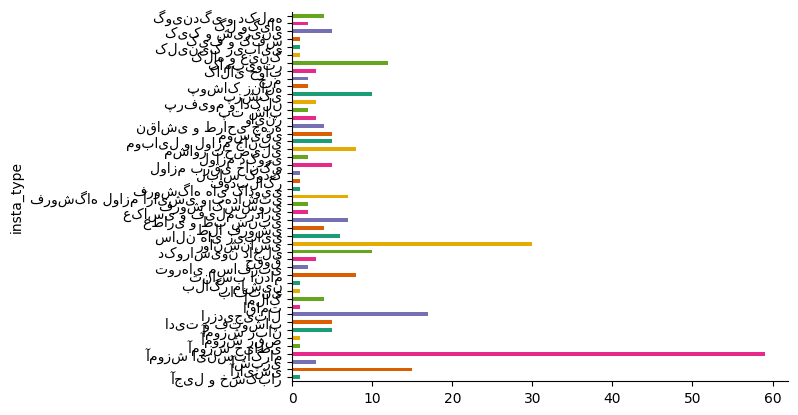

In [33]:
# @title ÿ≠Ÿàÿ≤Ÿá Ÿæ€åÿ¨

from matplotlib import pyplot as plt
import seaborn as sns
df_cleaned.groupby('insta_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# prompt: keep the insta_type collumn and then save them in a list

insta_types = df_cleaned['insta_type'].tolist()
print(insta_types)


['ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ≠ŸÇŸàŸÇ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿßŸÖŸÑÿß⁄©', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'Ÿæÿ≤ÿ¥⁄©€å', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ≤ÿ®ÿßŸÜ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿØ⁄©Ÿàÿ±ÿßÿ≥€åŸàŸÜ ÿØÿßÿÆŸÑ€å', 'ŸÜŸÇÿßÿ¥€å Ÿà ÿ∑ÿ±ÿßÿ≠€å ⁄ÜŸáÿ±Ÿá', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ±ŸÇÿµ', 'ÿ¢ÿ±ÿß€åÿ¥€å', 'ÿ¢ÿ±ÿß€åÿ¥€å', '⁄©ÿßŸÖŸæ€åŸàÿ™ÿ±', 'ÿßÿ±ÿ≤ÿØ€åÿ¨€åÿ™ÿßŸÑ', 'Ÿæÿ±ŸÅ€åŸàŸÖ Ÿà ÿßÿØ⁄©ŸÑŸÜ', 'ŸÑŸàÿßÿ≤ŸÖ ÿØ⁄©Ÿàÿ±€å', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ±ŸàÿßŸÜÿ¥ŸÜÿßÿ≥€å', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ÿ¢ŸÖŸàÿ≤ÿ¥ ÿß€åŸÜÿ≥ÿ™ÿß⁄Øÿ±ÿßŸÖ', 'ŸÑŸàÿßÿ≤ŸÖ ÿ®ÿ±ŸÇ€å ÿÆÿßŸÜ⁄Ø€å', 'ÿ±ŸàÿßŸÜÿ¥ŸÜÿßÿ≥€å', '⁄©ÿßŸÑÿß€å ÿÆŸàÿßÿ®', '⁄©€åŸÅ Ÿà ⁄©ŸÅÿ¥', 'ÿ™ŸÜÿßÿ≥ÿ® ÿßŸÜÿØÿßŸÖ', 'ÿØ⁄©Ÿàÿ

In [7]:
!pip install openai==0.28

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [115]:
input_list = ["""| ŸÖÿπ€åŸÜ ÿµÿßÿØŸÇ€åÿßŸÜ | ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ±ÿß€å⁄ØÿßŸÜ ÿßÿ±ÿ≤ ÿØ€åÿ¨€åÿ™ÿßŸÑ | ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ®ÿßÿ≤ÿßÿ±Ÿáÿß€å ŸÖÿßŸÑ€å
üìà ⁄©ÿßÿ±ÿ¥ŸÜÿßÿ≥ ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ™ÿ≠ŸÑ€åŸÑ ⁄Øÿ± ÿ®ÿßÿ≤ÿßÿ±Ÿáÿß€å ŸÖÿßŸÑ€å
üí∞ ÿß€åŸÜÿ¨ÿß ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ™ÿ±€åÿØ ÿ±Ÿà ÿ®Ÿá ÿ≤ÿ®ÿßŸÜ ÿ≥ÿßÿØŸá €åÿßÿØ ÿ®⁄Ø€åÿ±
"""]

In [116]:
import re
def remove_emojis_and_clean_text(input_list):
    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    cleaned_list = []

    for text in input_list:
        # Remove emojis from each text block
        text = emoji_pattern.sub(r'', text)

        # Remove unwanted characters and preserve spaces and Persian characters
        text = re.sub(r'[^\w\sÿ¢-€å]', ' ', text)

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        cleaned_list.append(text)

    return cleaned_list


In [117]:
cleaned_list = remove_emojis_and_clean_text(input_list)
print(cleaned_list)

['ŸÖÿπ€åŸÜ ÿµÿßÿØŸÇ€åÿßŸÜ ÿ¢ŸÖŸàÿ≤ÿ¥ ÿ±ÿß€å⁄ØÿßŸÜ ÿßÿ±ÿ≤ ÿØ€åÿ¨€åÿ™ÿßŸÑ ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ®ÿßÿ≤ÿßÿ±Ÿáÿß€å ŸÖÿßŸÑ€å ⁄©ÿßÿ±ÿ¥ŸÜÿßÿ≥ ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ™ÿ≠ŸÑ€åŸÑ ⁄Øÿ± ÿ®ÿßÿ≤ÿßÿ±Ÿáÿß€å ŸÖÿßŸÑ€å ÿß€åŸÜÿ¨ÿß ÿßŸÇÿ™ÿµÿßÿØ Ÿà ÿ™ÿ±€åÿØ ÿ±Ÿà ÿ®Ÿá ÿ≤ÿ®ÿßŸÜ ÿ≥ÿßÿØŸá €åÿßÿØ ÿ®⁄Ø€åÿ±']


In [118]:
import openai
import pandas as pd

# Load your API key from an environment variable or secret management service
openai.api_key = 'your_open_ai_token'

# Read the Excel file into a DataFrame
df = pd.read_excel('chunk_1.xlsx')

# Function to classify bio using GPT-4
def classify_bio(bio, candidate_labels):
    messages = [
        {"role": "system", "content": "You are a helpful assistant that categorizes Instagram bios."},
        {"role": "user", "content": f"Classify the following Instagram bio into one of these categories: {', '.join(candidate_labels)}.\n\nBio: {bio}\n\nCategory:"}
    ]
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=messages,
        max_tokens=20,
        n=1,
        stop=None,
        temperature=0.7,
    )
    category = response.choices[0].message['content'].strip()
    return category

# Sample bios to classify
bios = cleaned_list
# Apply the classification function to each bio
results = [classify_bio(bio, insta_types) for bio in bios]

# Print results
print(results)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


['ÿßÿ±ÿ≤ÿØ€åÿ¨€åÿ™ÿßŸÑ']
